# Metadata:
* @Autor:Rafael Esteban Torres Herreño
* @Date: 30/04/2022
* @Description: This python notebook shows the practice of a neuronal network applied to the bank marketing dataset 

##P1.Importando librerias.

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense

from sklearn import preprocessing # para convertir datos categoricos a numericos
le =preprocessing.LabelEncoder()  #instanciamos el Codificador

##P2. cargue del dataset

In [48]:
df_bm = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/mercadeo_bancario.csv', encoding='utf-8')
df_bm.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [49]:
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

###P2.1 conociendo la data y corrigiendola

In [50]:
trabajo = {
    'unknown': 0,
    'admin.': 1, 
    'housemaid': 2, 
    'management': 3, 
    'retired': 4, 
    'self-employed': 5, 
    'student': 6, 
    'technician': 7, 
    'unemployed': 8,
    'blue-collar': 9,
    'services': 10,
    'entrepreneur': 11
    }
df_bm['trabajo'] = df_bm['trabajo'].map(trabajo)

In [51]:
estado_civil = {
    'unknown': 0,
    'single': 1,
    'married': 2,
    'divorced' : 3
    }
df_bm['estado_civil '] = df_bm['estado_civil '].map(estado_civil)

In [52]:
educacion = {
    'unknown': 0,
    'preschool': 1,
    'primary_school': 2,
    'tecnical_school': 3,
    'Technological_school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}
df_bm['educacion'] = df_bm['educacion'].map(educacion)

In [53]:
credito_sin_pago = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
df_bm['credito_sin_pago'] = df_bm['credito_sin_pago'].map(credito_sin_pago)

In [54]:
prestamo_vivienda = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
df_bm['prestamo_vivienda'] = df_bm['prestamo_vivienda'].map(prestamo_vivienda)

In [55]:
prestamo_personal = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
df_bm['prestamo_personal'] = df_bm['prestamo_personal'].map(prestamo_personal)

In [56]:
contacto = {
    'cellular': 1,
    'telephone': 2,
}
df_bm['contacto'] = df_bm['contacto'].map(contacto)

In [57]:
mes = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
df_bm['mes'] = df_bm['mes'].map(mes)

In [58]:
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
df_bm['dia_semana'] = df_bm['dia_semana'].map(dia_semana)

In [59]:
df_bm.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,9,2,1,7,2,1,0,268017,0,5,1,8,5,210,43,0,88,0
1,53,7,2,0,1,0,0,0,0,0,0,1,11,6,138,0,0,14,0
2,28,3,1,7,3,0,1,0,308036,0,0,1,6,5,339,27,2,1993,1
3,39,10,2,4,1,0,0,0,0,0,4,1,4,6,185,0,0,1338,0
4,55,4,2,1,2,0,1,0,249888,0,4,1,8,6,137,2,1,1184,1


* Ya se tiene un estandar de datos para hacer el entrenamiento del modelo utilizando Deep Learning

##P3. Dividir los datos de entrada y salida (categoria).


In [73]:
X = df_bm[['edad','trabajo','educacion']] #valores de entrada, la capa de entrada de la red neuronal depende de la cantidad de valores a predecir en este caso 1 neurona
y = df_bm['si_no']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   edad       41188 non-null  int64
 1   trabajo    41188 non-null  int64
 2   educacion  41188 non-null  int64
dtypes: int64(3)
memory usage: 965.5 KB


In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

##P4. creando el modelo

In [75]:
# crea el modelo
model3 = Sequential()
model3.add(Dense(6, input_dim=3, activation='relu'))   #dos capas en una(1° con 1 neuronas (caracteristicas de entrada), 2° con 12 neuronas  )
model3.add(Dense(12, activation='relu'))
model3.add(Dense(24, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  #al ser una clasificación binaria usaremos sigmoidal
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 24        
                                                                 
 dense_13 (Dense)            (None, 12)                84        
                                                                 
 dense_14 (Dense)            (None, 24)                312       
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________


##P5. compilando modelo

In [76]:
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])

##P6. Entrenando modelo

In [77]:
historial= model3.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
3090/3090 [==============================] - 6s 2ms/step - loss: 0.3915 - acc: 0.8806
Epoch 2/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3547 - acc: 0.8882
Epoch 3/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3515 - acc: 0.8882
Epoch 4/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3481 - acc: 0.8882
Epoch 5/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3448 - acc: 0.8881
Epoch 6/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3428 - acc: 0.8882
Epoch 7/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3417 - acc: 0.8881
Epoch 8/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3409 - acc: 0.8882
Epoch 9/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3403 - acc: 0.8886
Epoch 10/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3403 - acc: 0.8885
Epoch 11/100
3090/3

##P7.Graficamos el entrenamiento

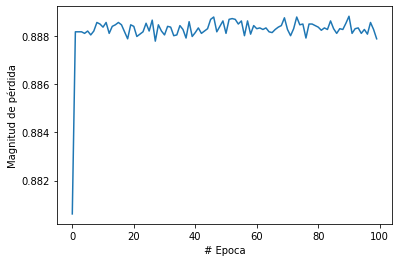

In [79]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["acc"])

##P8. Evaluar la Red Neuronal

In [80]:
# evalua el modelo
scores3 = model3.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

322/322 [==============================] - 1s 2ms/step - loss: 0.3405 - acc: 0.8844

acc: 88.44%


##P9.exportar modelo

In [81]:
model3.save('DL_BANKMARKETING.h5')